In [1]:
import pandas as pd

df=pd.read_csv('D:\DATA ANALYST\DASHBOARD\superstore.csv',low_memory=False)

unused_columns = df.columns[df.nunique() <= 1]
print(unused_columns)

Index(['记录数'], dtype='object')


In [2]:
df.drop(unused_columns, axis=1, inplace=True)

In [3]:
df

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,2014-12-03 00:00:00.000,CA-2014-109701,High,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,2014-12-03 00:00:00.000,CA-2014-109701,High,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,2014-12-18 00:00:00.000,CA-2014-106964,Medium,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,2014-12-25 00:00:00.000,CA-2014-145219,Critical,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


In [4]:
# make columns name uniform, change . with _

In [5]:
df.rename(columns=lambda x: x.strip().replace(".", "_"), inplace=True)
df.columns

Index(['Category', 'City', 'Country', 'Customer_ID', 'Customer_Name',
       'Discount', 'Market', 'Order_Date', 'Order_ID', 'Order_Priority',
       'Product_ID', 'Product_Name', 'Profit', 'Quantity', 'Region', 'Row_ID',
       'Sales', 'Segment', 'Ship_Date', 'Ship_Mode', 'Shipping_Cost', 'State',
       'Sub_Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [6]:
column_data_types = df.dtypes
print(column_data_types)

Category           object
City               object
Country            object
Customer_ID        object
Customer_Name      object
Discount          float64
Market             object
Order_Date         object
Order_ID           object
Order_Priority     object
Product_ID         object
Product_Name       object
Profit            float64
Quantity            int64
Region             object
Row_ID              int64
Sales               int64
Segment            object
Ship_Date          object
Ship_Mode          object
Shipping_Cost     float64
State              object
Sub_Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object


In [7]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])
column_data_types = df.dtypes
print(column_data_types)

Category                  object
City                      object
Country                   object
Customer_ID               object
Customer_Name             object
Discount                 float64
Market                    object
Order_Date        datetime64[ns]
Order_ID                  object
Order_Priority            object
Product_ID                object
Product_Name              object
Profit                   float64
Quantity                   int64
Region                    object
Row_ID                     int64
Sales                      int64
Segment                   object
Ship_Date         datetime64[ns]
Ship_Mode                 object
Shipping_Cost            float64
State                     object
Sub_Category              object
Year                       int64
Market2                   object
weeknum                    int64
dtype: object


In [8]:
# only select European market to this Dashboard Project

In [9]:
df2 = df[df['Market'].isin(['EU'])]
#df2['Order_Date'] = pd.to_datetime(df2['Order_Date'])
#df2['Month'] = df2['Order_Date'].dt.month
df3 = pd.DataFrame(df2)

# Add a new column 'Month' representing the month (1 to 12)
df3['Month'] = df3['Order_Date'].dt.month

df3

,Category,City,Country,Customer_ID,Customer_Name,Discount,Market,Order_Date,Order_ID,Order_Priority,...,Segment,Ship_Date,Ship_Mode,Shipping_Cost,State,Sub_Category,Year,Market2,weeknum,Month
3129,Office Supplies,Echirolles,France,MG-178902,Michael Granlund,0.00,EU,2011-01-05,ES-2011-3848439,Medium,...,Home Office,2011-01-07,First Class,15.27,Rhône-Alpes,Art,2011,EU,2,1
3130,Office Supplies,Echirolles,France,MG-178902,Michael Granlund,0.00,EU,2011-01-05,ES-2011-3848439,Medium,...,Home Office,2011-01-07,First Class,20.64,Rhône-Alpes,Art,2011,EU,2,1
3131,Office Supplies,Noisy-le-Sec,France,SN-205602,Skye Norling,0.00,EU,2011-03-18,ES-2011-5522951,Medium,...,Home Office,2011-03-20,First Class,7.06,Ile-de-France,Fasteners,2011,EU,12,3
3132,Office Supplies,Carcassonne,France,TW-210252,Tamara Willingham,0.00,EU,2011-03-24,ES-2011-5504927,Critical,...,Home Office,2011-03-27,First Class,95.81,Languedoc-Roussillon,Binders,2011,EU,13,3
3133,Office Supplies,Carcassonne,France,TW-210252,Tamara Willingham,0.00,EU,2011-03-24,ES-2011-5504927,Critical,...,Home Office,2011-03-27,First Class,48.16,Languedoc-Roussillon,Binders,2011,EU,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,Technology,Ivry-sur-Seine,France,TS-216102,Troy Staebel,0.15,EU,2014-12-11,IT-2014-2250081,Medium,...,Consumer,2014-12-16,Standard Class,24.23,Ile-de-France,Copiers,2014,EU,50,12
43416,Office Supplies,Les Mureaux,France,JH-159852,Joseph Holt,0.10,EU,2014-12-20,ES-2014-1728888,Medium,...,Consumer,2014-12-25,Standard Class,5.14,Ile-de-France,Storage,2014,EU,51,12
43417,Technology,Sarcelles,France,PG-188952,Paul Gonzalez,0.15,EU,2014-12-29,ES-2014-5861616,Medium,...,Consumer,2015-01-03,Standard Class,45.60,Ile-de-France,Machines,2014,EU,53,12
43418,Technology,Sarcelles,France,PG-188952,Paul Gonzalez,0.15,EU,2014-12-29,ES-2014-5861616,Medium,...,Consumer,2015-01-03,Standard Class,6.49,Ile-de-France,Machines,2014,EU,53,12


In [10]:
# save dataframe df3 to cleaned csv file

In [11]:
df3.to_csv('D:\superstore_cleaned.csv', index=False)

In [12]:
# Exploratory Data Analysis and simple Visualization

Top 50 lowest profit product names:
Hoover Stove, White
Office Star Executive Leather Armchair, Black
Sauder Classic Bookcase, Metal
Bevis Conference Table, Fully Assembled
Barricks Conference Table, Adjustable Height
Hoover Stove, White
Apple Smart Phone, with Caller ID
Novimex Executive Leather Armchair, Adjustable
Canon Wireless Fax, Color
Lesro Conference Table, with Bottom Storage
Lesro Round Table, Adjustable Height
Samsung Smart Phone, Cordless
Memorex Router, USB
Cisco Smart Phone, Cordless
HP Wireless Fax, Laser
Nokia Smart Phone, Full Size
Bush Library with Doors, Traditional
Chromcraft Coffee Table, Fully Assembled
Barricks Round Table, Adjustable Height
Hamilton Beach Stove, Black
Hon Round Table, with Bottom Storage
Ikea Classic Bookcase, Metal
Dania Library with Doors, Pine
Okidata Inkjet, Wireless
Barricks Conference Table, with Bottom Storage
Barricks Round Table, with Bottom Storage
Okidata Printer, White
Bevis Round Table, Adjustable Height
Motorola Smart Phone, with 

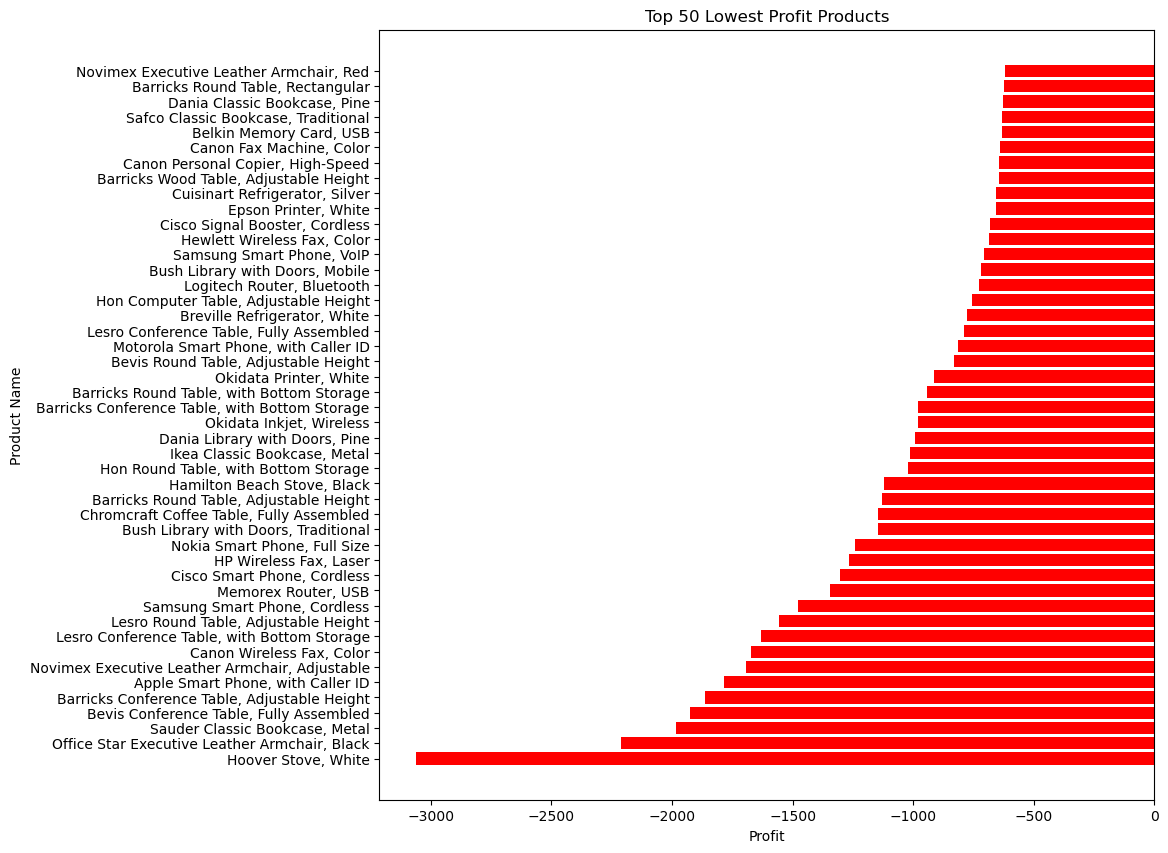

In [13]:
import matplotlib.pyplot as plt

sorted_df3 = df3.sort_values(by='Profit')
top_50_lowest_profit_products = sorted_df3.head(50)
product_names = top_50_lowest_profit_products['Product_Name']

print("Top 50 lowest profit product names:")
for product in product_names:
    print(product)

plt.figure(figsize=(10, 10))
plt.barh(product_names, top_50_lowest_profit_products['Profit'], color='red')
plt.xlabel("Profit")
plt.ylabel("Product Name")
plt.title("Top 50 Lowest Profit Products")
plt.show()

City
Stockholm        -11632.8900
Hanover          -10440.1650
Toulouse         -10382.2215
Birmingham        -5961.7440
Amsterdam         -5334.0540
Dublin            -4672.7010
Lisbon            -4277.9700
Rome              -4259.1720
Utrecht           -3654.6000
Milan             -3574.7040
Reims             -3305.2440
The Hague         -3180.8700
Tilburg           -3099.9600
Sheffield         -3078.3000
Le Mans           -3047.6910
Groningen         -2801.1000
Bergen op Zoom    -2772.0450
Copenhagen        -2660.3250
Naples            -2481.3510
Cork              -2458.0200
Name: Profit, dtype: float64


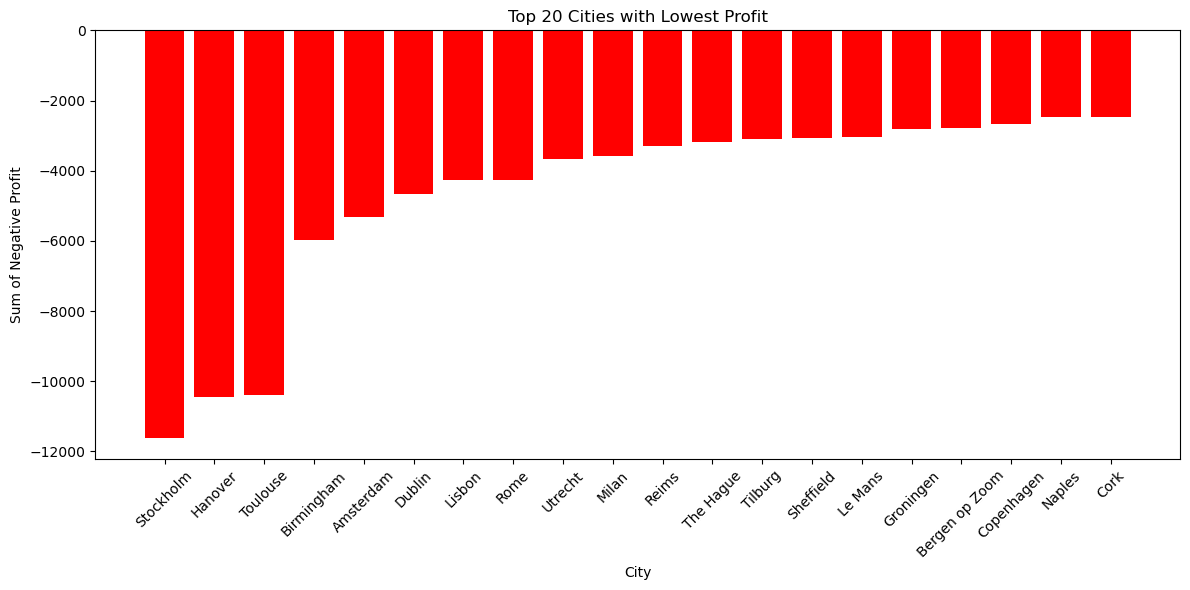

In [14]:
# Filter rows with negative profit
negative_profit_df = df3[df3['Profit'] < 0]
loss_city = negative_profit_df.groupby('City')['Profit'].sum()
sorted_loss_city_df = loss_city.sort_values(ascending=True)

top_20_lowest_profit = sorted_loss_city_df.head(20)
print (top_20_lowest_profit)

plt.figure(figsize=(12, 6))
plt.bar(top_20_lowest_profit.index, top_20_lowest_profit.values, color='red')
plt.xlabel('City')
plt.ylabel('Sum of Negative Profit')
plt.title('Top 20 Cities with Lowest Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()